In [8]:
#Crea / Presenta la forma que creas más conveniente para describir qué grado por escuela tuvo el mejor puntaje en "reading", 
# y con ello saber qué género es el que predomina en este filtro.
import pandas 
import numpy
df = pandas.read_csv (r'C:\Users\ncordova\Documents\Python Fundamentals\clean_students_complete.csv')
df.head()

,Unnamed: 0,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [13]:
best_grade = df.groupby(["school_name","grade"])["reading_score"].mean()
best_grade = best_grade.to_frame()
best_grade.head()


reading_score
school_name         grade               
Bailey High School  10th       80.907183
                    11th       80.945643
                    12th       80.912451
                    9th        81.303155
Cabrera High School 10th       84.253219

In [14]:
filtered = best_grade.loc[best_grade.groupby('school_name').reading_score.idxmax()]
filtered.head()


,,reading_score
school_name,grade,
Bailey High School,9th,81.303155
Cabrera High School,12th,84.287958
Figueroa High School,10th,81.408912
Ford High School,10th,81.262712
Griffin High School,11th,84.288089


<AxesSubplot:title={'center':'Nivel escolar con mejor desempeño, por plantel educativo'}, ylabel='Desempeño en lectura'>

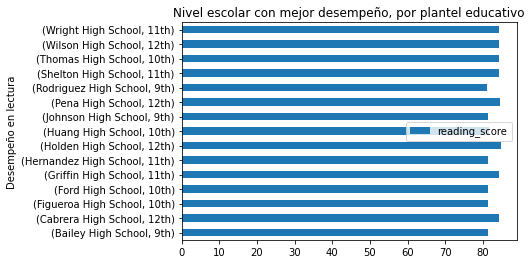

In [20]:
filtered.plot(kind="barh",xlabel="Desempeño en lectura",title="Nivel escolar con mejor desempeño, por plantel educativo")

In [23]:
by_gender = pandas.merge(filtered,df, how="left", on=["school_name", "grade"])
by_gender.head()

,school_name,grade,reading_score_x,Unnamed: 0,Student ID,student_name,gender,reading_score_y,math_score
0,Bailey High School,9th,81.303155,17871,17871,Blake Martin,M,75,59
1,Bailey High School,9th,81.303155,17874,17874,Frank Marsh,M,71,89
2,Bailey High School,9th,81.303155,17875,17875,Charles Goodman Jr.,M,90,61
3,Bailey High School,9th,81.303155,17880,17880,Aaron Moyer,M,81,62
4,Bailey High School,9th,81.303155,17882,17882,Michael Dean,M,99,79


F    5062
M    5008
Name: gender, dtype: int64


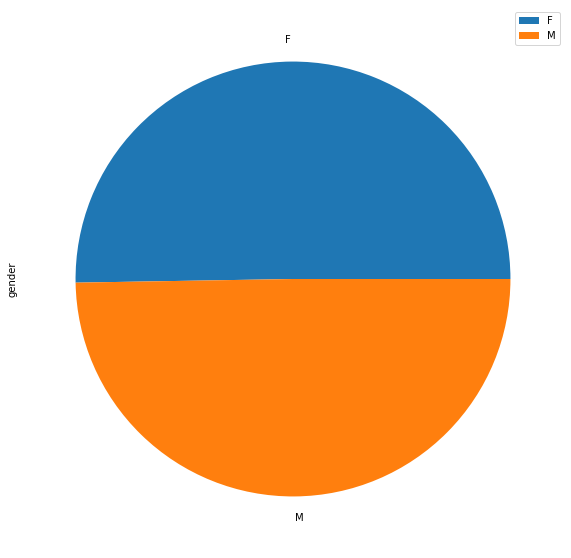

In [29]:
#Qué genero predominó más
for_pie = by_gender['gender'].value_counts()
print(for_pie)
pie_plot = for_pie.plot.pie(figsize = (10,10), legend=True)
